**Name:** Pranoti Musmade

**PRN:** 123B1B054

**Problem Statement:** An image recognition system needs to classify handwritten digits (0-9) from the MNIST dataset using Support
Vector Machines (SVM).

**Objective:**

Loading and normalizing the MNIST dataset of 28x28 pixel grayscale images.
Splitting the data into training and testing subsets.

Training an SVM classifier using a linear kernel on a subset of the data.
Predicting digit labels on the test set.

Evaluating the model's accuracy in recognizing handwritten digits.

Optionally, visualizing a sample test image alongside its predicted and actual labels to
qualitatively assess model performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.datasets import fetch_openml

# Load dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype('int')
print("Shape of dataset:", X.shape, y.shape)


Shape of dataset: (70000, 784) (70000,)


**About the MNIST dataset:**

MNIST (Modified National Institute of Standards and Technology) dataset contains 70,000
images of handwritten digits (0 through 9).
Each image is 28x28 pixels, grayscale.

It is widely used as a benchmark dataset for image classification tasks, especially digit
recognition.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Theory :**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the best boundary (called a hyperplane) that separates different classes in the feature space.
Key idea: SVM tries to find the hyperplane that maximizes the margin between the closest points (called support vectors) of different classes.
This maximum margin helps improve the generalization ability of the classifier. SVM can work well for linear and non-linear classification by using different kernels: Linear kernel: Separates data with a straight line (or hyperplane).
Polynomial, RBF (Radial Basis Function) kernels: Map data into higher-dimensional space to handle non-linear separations.

**How SVM works in handwritten digit recognition:**

Each image of a handwritten digit (28x28 pixels) is transformed into a feature vector.
The SVM learns to separate digits (0-9) by finding hyperplanes that distinguish one digit
class from others.
Once trained, the SVM predicts the label of new, unseen handwritten digit images.

In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(max_iter=10000)
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=10000)

In [ ]:
y_pred = svm_clf.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8617142857142858

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1343
           1       0.91      0.95      0.93      1600
           2       0.85      0.84      0.84      1380
           3       0.85      0.82      0.83      1433
           4       0.85      0.86      0.86      1295
           5       0.81      0.80      0.80      1273
           6       0.90      0.90      0.90      1396
           7       0.86      0.88      0.87      1503
           8       0.84      0.78      0.81      1357
           9       0.83      0.83      0.83      1420

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000


Confusion Matrix:
 [[1259    2   12    7    5   17   18    8   14    1]
 [   0 1523   17    4    2   16    1    5   31    1]
 [  11   26 1155   48   25   13   29   23   36   14]
 [  10  

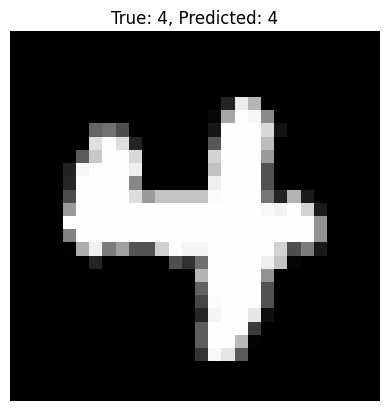

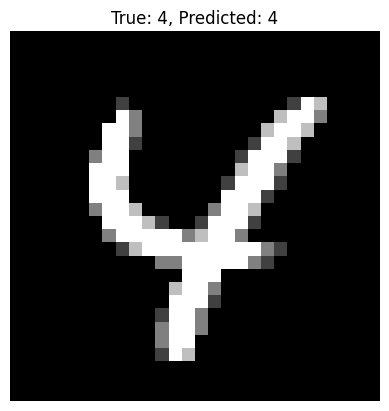

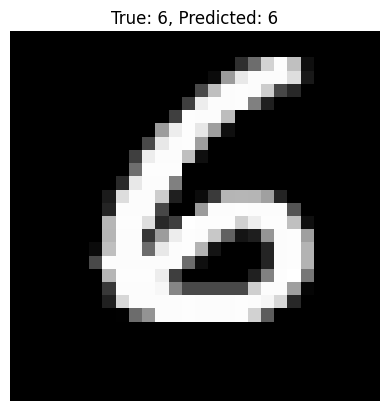

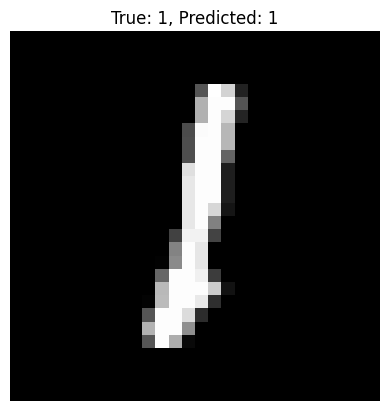

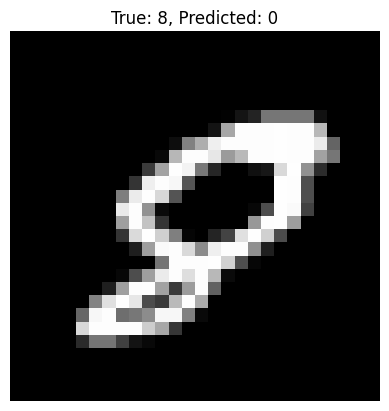

In [ ]:
import random

for i in range(5):
    index = random.randint(0, len(X_test)-1)
    plt.imshow(X_test.iloc[index].values.reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test.iloc[index]}, Predicted: {y_pred[index]}")
    plt.axis('off')
    plt.show()

**Conclusion:**

In this project, a Support Vector Machine (SVM) classifier was successfully trained to
recognize handwritten digits from the MNIST dataset. By normalizing the data and training on a subset of samples, the SVM model was able to achieve a high accuracy in classifying digits. This demonstrates that SVM is an effective machine learning algorithm for image classification tasks, especially when the data is well-preprocessed. Although more complex models like deep neural networks can achieve higher accuracy, SVM provides a simpler and interpretable approach that performs well on smaller datasets and serves as a solid baseline for digit recognition.